### LAB Databehandling

För den här uppgiften kommer vi att analysera ett dataset med amerikanska universitet och högskolor, inklusive allmän statistik om deras studenter.
Det finns både privata och offentliga skolor, så det blir intressant att se hur de skiljer sig åt.
Övriga data fokuserar mest på studenternas "elitnivå", något som många skolor verkar lägga stor vikt vid, åtminstone i USA.

Jag kommer att gå igenom stegen ett i taget och analysera olika delar av dataramen samt skapa visuella representationer för bättre läsbarhet.

Del 1 – importeringar, variabler, inläsning av dataramen och kontroll av saknade/ogiltiga data

*(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data. college. Make slue that you have the directory set to the correct location for the data.*

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#We start with the preparation, setting variables and loading the Dataframe
data = "./Data/College.csv"

college = pd.read_csv(data)

#Now we check that everything is fine in the data, and check for possible missing or invalid values
college.head()
college.info()
#college.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Nu när filen är inläst och vi har försäkrat oss om att allt ser bra ut kan vi gå vidare till punkt b:

*(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in column named something like Unnamed: 0. We don't really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:* 

*1: college2 = pd.read_csv('College.csv' , index_col=0)*

*2 college3 = college.rename ({'Unnamed: 0': 'College '}, axis=1)*

*3 college3 = college3.set_index('College')* 

*This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. Overwrite your modified version to the data with the following: college = college3*

In [46]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [47]:
college2 = pd.read_csv(data, index_col=0)
college3= college.rename({"Unnamed: 0": "College"},axis=1)
college3 = college3.set_index("College")

college = college3

college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


För punkt c ska vi skapa en sammanfattning med .describe()
Här kan vi se statistik för varje kolumn, inklusive min- och maxvärden som kan vara användbara för att hitta de första felen i filen.
I det här fallet, även om skillnaden mellan min och max är mycket stor, kan det ändå vara rimligt i sammanhanget.

In [48]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Nu ska vi skapa den första visualiseringen för punkt d:

*(d) Use the pd . plotting . scatter_matrix() function to product a, scatterplot matrix of the first columns [Top10perc , Apps , Enroll] . Recall that you can reference a list C of columns of a, data, frame A using A [C] .*

array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

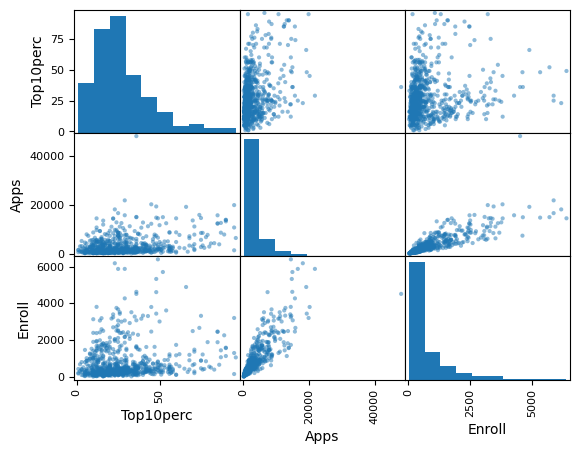

In [49]:
pd.plotting.scatter_matrix(college[["Top10perc","Apps","Enroll"]])


*(e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate Versus Private.*

Innan vi visualiserar skapar jag också en textversion för att göra det lättare att läsa.

In [50]:
college.groupby("Private")["Outstate"].describe()

,count,mean,std,min,25%,50%,75%,max
Private,,,,,,,,
No,212.0,6813.410377,2145.248389,2580.0,5366.0,6609.0,7844.0,15732.0
Yes,565.0,11801.693805,3707.470822,2340.0,9100.0,11200.0,13970.0,21700.0


Text(0, 0.5, 'Outstate')

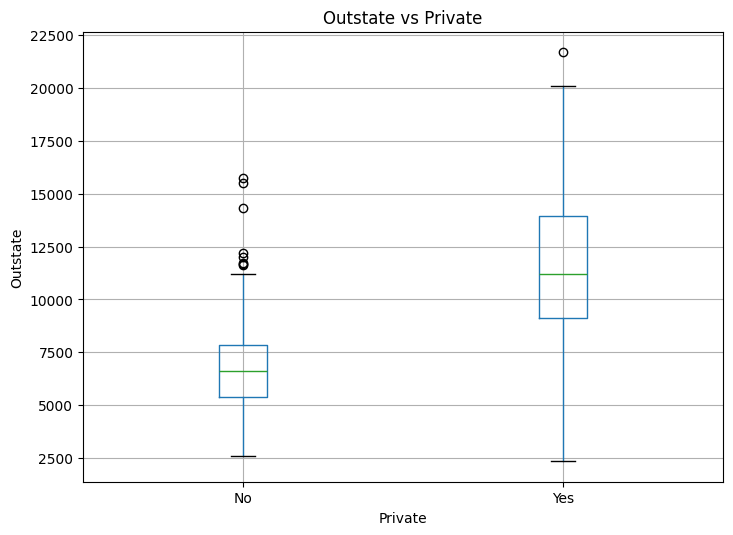

In [51]:
college.boxplot(column="Outstate", by="Private", figsize = (8,6))
plt.title("Outstate vs Private")
plt.suptitle("")
plt.xlabel("Private")
plt.ylabel("Outstate")

För punkt f kommer vi att skapa en ny kolumn som kontrollerar om elitstudenterna (top10perc) överstiger hälften av alla studenter, och sedan återskapa boxplottet för Outstate, den här gången sorterat efter Elite.

*f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the*
*proportion of students coming from the top 10% of their highschool classes exceeds 50%.*

college['Elite '] = pd.cut(college['Top10perc '],[0,0.5,1],labels =['No', 'Yes'])

*Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method*
*again to produce side-by-side boxplots of Outstate versus Elite.*

In [ ]:
#college["Elite"]= pd.cut(college["Top10perc"],[0,50,100],labels=["No","Yes"])
#That was the book version, I'll instead use a boolean condition version, which I think is cleaner and more readable
college["Elite"]=np.where(college["Top10perc"]>50, "Yes", "No")
college.value_counts("Elite")
#Like before I'll also add a describe to make it more complete than just value counts
college.groupby("Elite")["Outstate"].describe()

,count,mean,std,min,25%,50%,75%,max
Elite,,,,,,,,
No,699.0,9904.165951,3640.558534,2340.0,7070.0,9556.0,12155.0,21700.0
Yes,78.0,15248.564103,4115.230670,5224.0,12219.0,16950.0,18411.5,20100.0


Text(0, 0.5, 'Outstate')

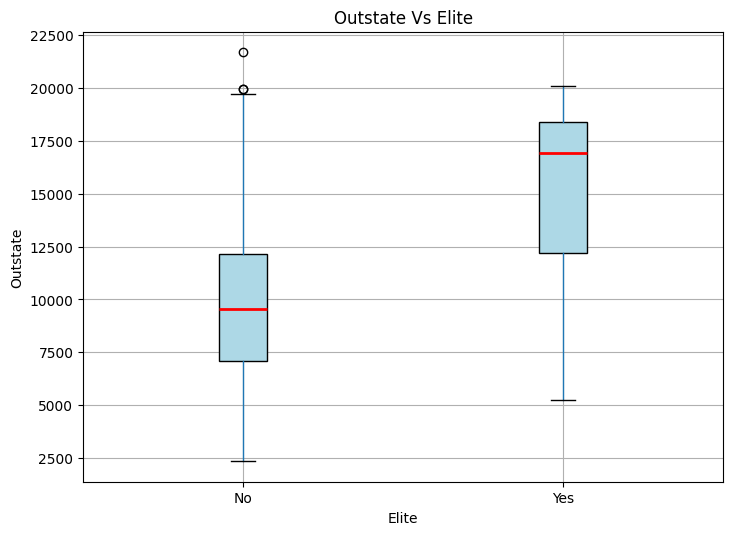

In [ ]:
college.boxplot(column="Outstate",by="Elite", figsize=(8,6),
                #I asked chatGPT to help me making the plot more readable and interesting, I got these color options
                patch_artist = True, 
                boxprops=dict(facecolor="lightblue"), 
                medianprops=dict(color="red", linewidth=2))
plt.title("Outstate Vs Elite")
plt.suptitle("")
plt.xlabel("Elite")
plt.ylabel("Outstate")

Punkt g ber oss skapa histogram för olika värden:

Först ska vi titta på studentrelaterade data.

*g) Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables.*
*The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that fourplots can be made simultaneously.*
*By changing the arguments you can divide the screen up in other combinations.*

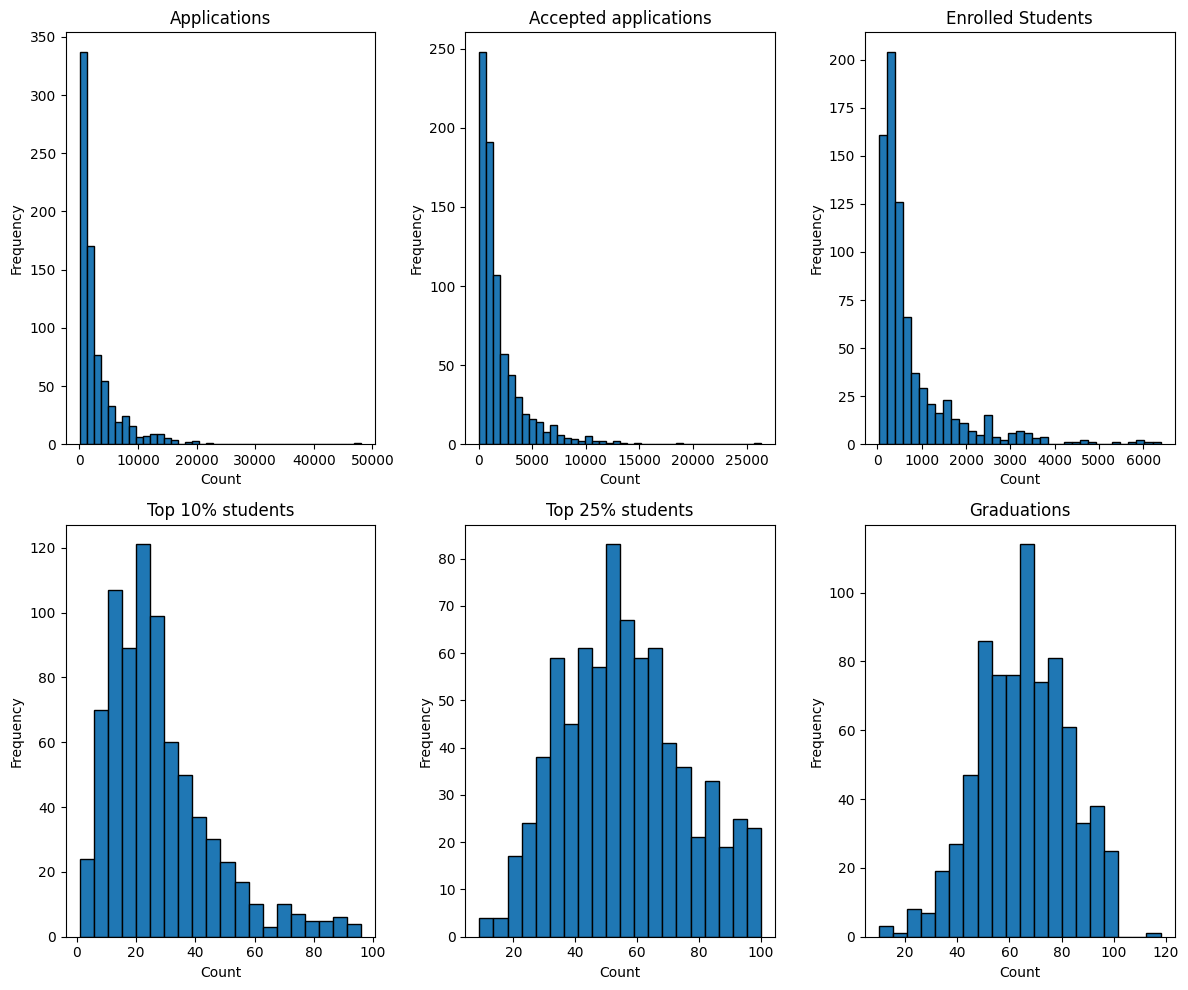

In [78]:
fig, axs = plt.subplots(2,3, figsize=(12,10))
axs[0,0].hist(college["Apps"],bins=40,edgecolor="black")
axs[0,0].set(title="Applications", xlabel="Count",ylabel="Frequency")
axs[0,1].hist(college["Accept"],bins=40,edgecolor="black")
axs[0,1].set(title="Accepted applications", xlabel="Count",ylabel="Frequency")
axs[0,2].hist(college["Enroll"],bins=35,edgecolor="black")
axs[0,2].set(title="Enrolled Students", xlabel="Count",ylabel="Frequency")
axs[1,0].hist(college["Top10perc"],bins=20,edgecolor="black")
axs[1,0].set(title="Top 10% students", xlabel="Count",ylabel="Frequency")
axs[1,1].hist(college["Top25perc"],bins=20,edgecolor="black")
axs[1,1].set(title="Top 25% students", xlabel="Count",ylabel="Frequency")
axs[1,2].hist(college["Grad.Rate"],bins=20,edgecolor="black")
axs[1,2].set(title="Graduations", xlabel="Count",ylabel="Frequency")
plt.tight_layout()

Dessutom ska vi titta på högskolornas ekonomiska data.

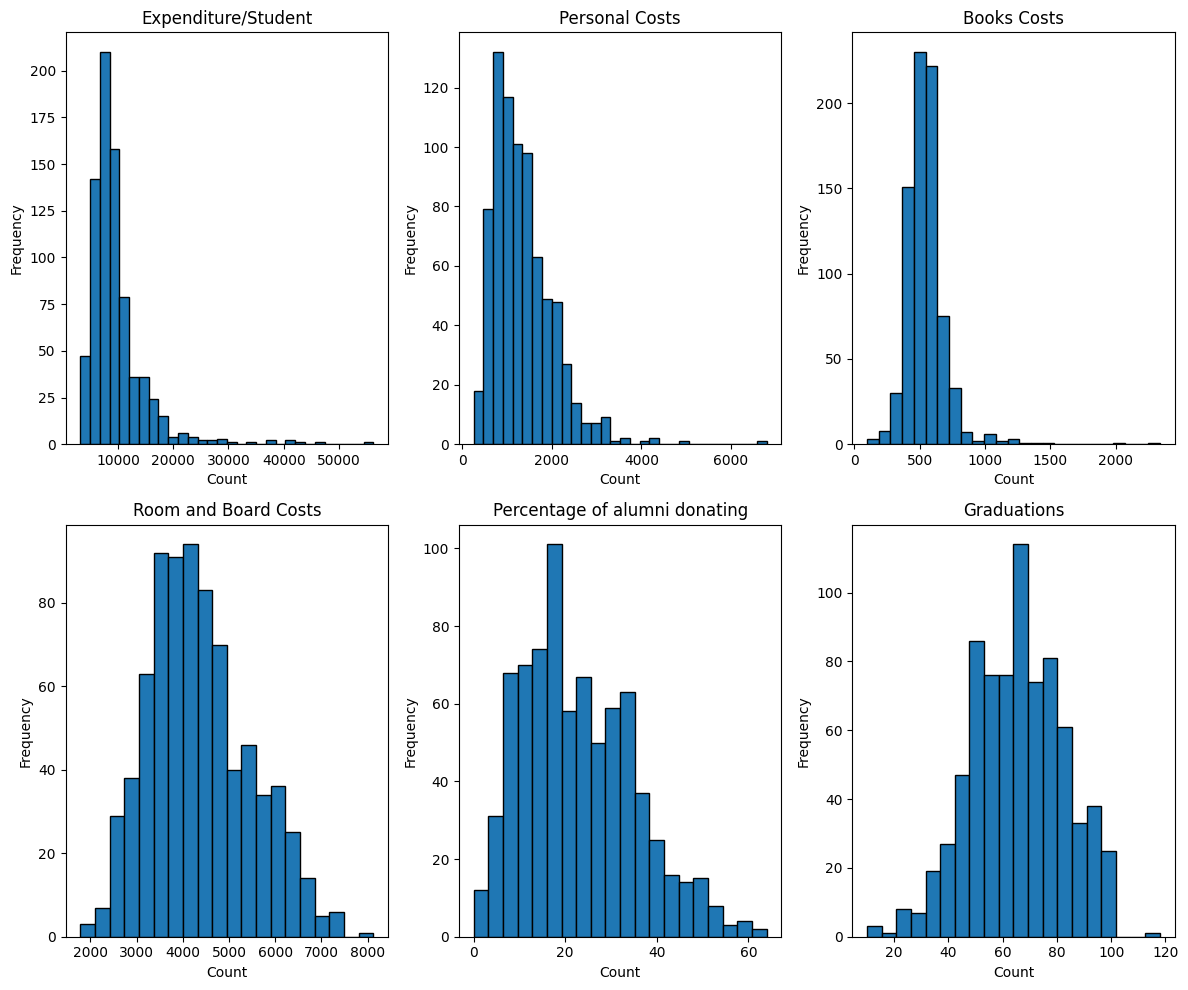

In [80]:
fig, axs = plt.subplots(2,3, figsize=(12,10))
axs[0,0].hist(college["Expend"],bins=30,edgecolor="black")
axs[0,0].set(title="Expenditure/Student", xlabel="Count",ylabel="Frequency")
axs[0,1].hist(college["Personal"],bins=30,edgecolor="black")
axs[0,1].set(title="Personal Costs", xlabel="Count",ylabel="Frequency")
axs[0,2].hist(college["Books"],bins=25,edgecolor="black")
axs[0,2].set(title="Books Costs", xlabel="Count",ylabel="Frequency")
axs[1,0].hist(college["Room.Board"],bins=20,edgecolor="black")
axs[1,0].set(title="Room and Board Costs", xlabel="Count",ylabel="Frequency")
axs[1,1].hist(college["perc.alumni"],bins=20,edgecolor="black")
axs[1,1].set(title="Percentage of alumni donating", xlabel="Count",ylabel="Frequency")
axs[1,2].hist(college["Grad.Rate"],bins=20,edgecolor="black")
axs[1,2].set(title="Graduations", xlabel="Count",ylabel="Frequency")
plt.tight_layout()

Till sist, för punkt h, ska vi undersöka olika jämförelser i datasetet för att se möjliga korrelationer mellan olika variabler.
Först kan vi köra en generell korrelation mellan alla kolumner med numeriska värden genom att använda .corr()

Med detta kan vi snabbt se de starkaste korrelationerna mellan olika värden.

In [83]:
college.corr(numeric_only=True).round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00


Något jag vill göra nu är att spara en lista över de värden som har medelstark korrelation (0.3 till 0.6) samt de med stark korrelation (0.6+).
Eftersom jag också lade märke till att vissa värden har ett omvänt förhållande (negativa värden) kan det också vara intressant att analysera dessa.

In [ ]:
#We start by saving the data 
corr_matrix = college.corr(numeric_only=True).round(2)

#Now we flatten the matrix so we can have pairs of variables and the comparison value
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]
corr_pairs = corr_pairs[corr_pairs["Variable 1"] < corr_pairs["Variable 2"]] #This removes duplicates and self comparison

#Then we split it into categories
medium_corr = corr_pairs[(corr_pairs["Correlation"] >=0.3) & (corr_pairs["Correlation"] < 0.6)].sort_values(by="Correlation", ascending=False)
strong_corr = corr_pairs[(corr_pairs["Correlation"] >= 0.6)].sort_values(by="Correlation", ascending=False)
inv_corr = corr_pairs[(corr_pairs["Correlation"] <-0.2)].sort_values(by="Correlation", ascending=True)





För att skriva ut dataramarna använde jag en kodsnutt som jag fick från ChatGPT, där jag frågade efter ett sätt att skriva ut de tre dataseten sida vid sida istället för i ett långt vertikalt format.

In [102]:
from IPython.display import display, HTML

display(HTML(
    f"""
    <div style="display: flex; justify-content: space-around;">

        <div style="flex: 1; text-align: center;">
            <h3>🔹 Strong Correlations</h3>
            {strong_corr.to_html(index=False)}
        </div>

        <div style="flex: 1; text-align: center;">
            <h3>🟡 Medium Correlations</h3>
            {medium_corr.to_html(index=False)}
        </div>

        <div style="flex: 1; text-align: center;">
            <h3>🔻 Inverse Correlations</h3>
            {inv_corr.to_html(index=False)}
        </div>

    </div>
    """
))


Variable 1,Variable 2,Correlation
Enroll,F.Undergrad,0.96
Accept,Apps,0.94
Accept,Enroll,0.91
Top10perc,Top25perc,0.89
Accept,F.Undergrad,0.87
PhD,Terminal,0.85
Apps,Enroll,0.85
Apps,F.Undergrad,0.81
Expend,Outstate,0.67
Expend,Top10perc,0.66


Nu har vi listat de starkaste och svagaste korrelationerna mellan våra värden, vilket gör det mycket enklare att veta vad vi ska titta närmare på.
Vi kan också jämföra dessa värden med de icke-numeriska som vi har utelämnat i listan.

In [109]:
college.groupby("Elite")[["Grad.Rate", "Expend", "Personal","Apps","Accept","Enroll","Outstate"]].mean()

,Grad.Rate,Expend,Personal,Apps,Accept,Enroll,Outstate
Elite,,,,,,,
No,63.463519,8684.367668,1357.655222,2669.226037,1925.762518,748.645207,9904.165951
Yes,83.384615,18404.871795,1188.179487,5980.564103,2852.602564,1060.717949,15248.564103


Här börjar vi se att elituniversitet har avsevärt högre kostnader per student än icke-elituniversitet, men samtidigt något lägre personalkostnader.
Vi kan också se att de får mer än dubbelt så många ansökningar och dessutom accepterar fler studenter med en högre inskrivningsgrad, vilket innebär att de anses vara mer attraktiva.
Examensgraden (Grad Rate) är något högre på elituniversiteten, vilket är logiskt eftersom de har de främsta studenterna.
Slutligen tenderar de att ha betydligt högre studieavgifter (tuition).

Nu ska vi titta på samma sak för privata kontra offentliga skolor:

In [129]:
print(college.groupby("Private")[["Grad.Rate", "Expend", "Personal","Apps","Accept","Enroll","Outstate"]].mean())
print(college.groupby("Private")["Elite"].apply(lambda x:(x == "Yes").sum()))
print(college["Private"].value_counts())

         Grad.Rate        Expend     Personal         Apps       Accept  \
Private                                                                   
No       56.042453   7458.316038  1676.981132  5729.919811  3919.287736   
Yes      68.998230  10486.353982  1214.440708  1977.929204  1305.702655   

              Enroll      Outstate  
Private                             
No       1640.872642   6813.410377  
Yes       456.945133  11801.693805  
Private
No     13
Yes    65
Name: Elite, dtype: int64
Private
Yes    565
No     212
Name: count, dtype: int64


Vi kan se här att privata skolor har ungefär en tredjedel så många sökande som offentliga skolor, vilket kan bero på att studieavgifterna nästan är dubbelt så höga.

Examensgraden är något högre i privata skolor, vilket är rimligt med tanke på det större engagemang och den press/motivation som följer av att betala höga avgifter.

Vi kan också se att en stor majoritet av elituniversiteten är privata, vilket ger privata skolor 11,5 % elituniversitet jämfört med 6 % bland offentliga.